Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [1]:
%matplotlib inline

import numpy as np
import math
import scipy
from scipy import optimize
from matplotlib import pyplot as plt

In [2]:
def math_func(x):
    return math.sin(x/5) * math.exp(x/10) + 5 * math.exp(-1*x/2)

def map_to_array(func, sequence):
    return np.array(list(map(func, sequence)))

In [3]:
x = np.arange(1, 30, dtype=float)
y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-1 * x / 2)
y = map_to_array(math_func, x)

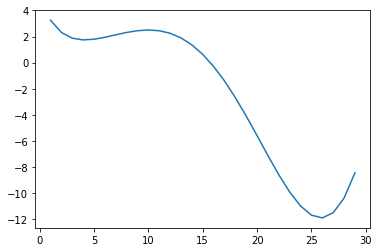

In [4]:
plt.plot(x, y)
plt.draw()

## 1 Задание BFGS

В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

In [5]:
scipy.optimize.minimize(math_func, np.array([4]))  # первый локальный минимум

      fun: 1.7452682904152543
 hess_inv: array([[5.93456151]])
      jac: array([-5.24520874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([4.13625698])

In [6]:
scipy.optimize.minimize(math_func, np.array([25]))  # второй локальный минимум

      fun: -11.89889466596626
 hess_inv: array([[1.67418754]])
      jac: array([-4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([25.88018592])

In [7]:
scipy.optimize.minimize(math_func, np.array([100]))

      fun: -6371.765229165741
 hess_inv: array([[0.00313742]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([88.71203598])

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [8]:
result_1 = scipy.optimize.minimize(math_func, np.array([2]), method='BFGS')
result_1

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

In [9]:
result_2 = scipy.optimize.minimize(math_func, np.array([30]), method='BFGS')
result_2

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

In [10]:
with open('answer1.txt', 'w') as f:
    f.write('{:.2f} {:.2f}'.format(result_1.fun, result_2.fun))

## Задача 2. Глобальная оптимизация

In [11]:
result = scipy.optimize.differential_evolution(math_func, [(1, 30)])

Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [12]:
with open('answer2.txt', 'w') as f:
    f.write('{:.2f}'.format(result.fun))

## Задача 3. Минимизация негладкой функции


In [13]:
int_math_func = lambda x: int(math_func(x))

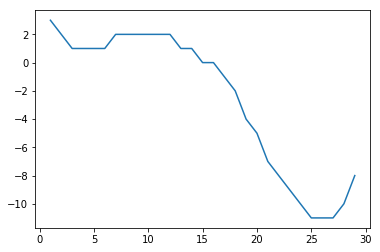

In [14]:
plt.plot(x, map_to_array(int_math_func, x))
plt.draw()


Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [15]:
scipy.optimize.minimize(int_math_func, np.array([2]), method='BFGS')

      fun: 2
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2.])

In [16]:
result_1 = scipy.optimize.minimize(int_math_func, np.array([30]), method='BFGS')  # типо не остановились на первой ступени
result_1

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [17]:
result_2 = scipy.optimize.differential_evolution(int_math_func, [(1, 30)])
result_2

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([27.44684864])

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [18]:
with open('answer3.txt', 'w') as f:
    f.write('{:.2f} {:.2f}'.format(result_1.fun, result_2.fun))